In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [380]:
df = pd.read_csv('laptop.csv')
df1 = df.copy()
df1.head()

Unnamed: 0                                              Model      Price  \
0           0  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...    ₹50,399   
1           1  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...    ₹23,990   
2           2  Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...    ₹26,989   
3           3  Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...    ₹69,990   
4           4  Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...  ₹1,02,990   

   Rating                      Generation                             Core  \
0    70.0       5th Gen AMD Ryzen 5 5600H            Hexa Core, 12 Threads   
1    56.0   11th Gen Intel Core i3 1115G4             Dual Core, 4 Threads   
2    55.0       7th Gen AMD Ryzen 3 7320U             Quad Core, 8 Threads   
3    60.0    12th Gen Intel Core i5 1240P   12 Cores (4P + 8E), 16 Threads   
4    78.0  14th Gen Intel Core i9 14900HX  24 Cores (8P + 16E), 32 Threads   

                Ram         SSD  \
0     8 GB DDR4 RAM  512 GB SSD   
1   8 GB LPDDR4 RAM  512 GB SSD   
2   8 GB LPDDR5 RAM  512 GB SSD   
3  16 GB LPDDR5 RAM  512 GB SSD   
4    16 GB DDR5 RAM    1 TB SSD   

                                         Display  \
0  15.6 inches, 1920 x 1080 pixels, Touch Screen   
1                15.6 inches, 1920 x 1080 pixels   
2                15.6 inches, 1920 x 1080 pixels   
3                13.3 inches, 1080 x 1920 pixels   
4                16.1 inches, 2560 x 1600 pixels   

                       Graphics             OS         Warranty  
0      4 GB AMD Radeon RX 6500M  Windows 11 OS  1 Year Warranty  
1            Intel UHD Graphics  Windows 11 OS  1 Year Warranty  
2           AMD Radeon Graphics  Windows 11 OS  1 Year Warranty  
3        Intel Iris Xe Graphics  Windows 11 OS  1 Year Warranty  
4  8 GB NVIDIA GeForce RTX 4060  Windows 11 OS  1 Year Warranty

In [381]:
df1 = df1.drop(columns=["Unnamed: 0","Warranty"])


In [382]:
import re

def convert_ssd_to_gb(ssd_string):
    """
    Extracts the storage number from the SSD string and converts it to GB.
    Handles values in both GB and TB.
    """
    if not isinstance(ssd_string, str):
        return None

    number_match = re.search(r'(\d+)', ssd_string)
    if not number_match:
        return None

    number = int(number_match.group(1))

    if 'tb' in ssd_string.lower():
        # Convert Terabytes to Gigabytes (1 TB = 1024 GB)
        return number * 1024
    else:
        # Assume it's already in GB
        return number

# Apply the function to your DataFrame's 'SSD' column
# Make sure your DataFrame is named 'df' or change the name accordingly
df1['SSD_GB'] = df1['SSD'].apply(convert_ssd_to_gb)

# (Optional) Display the first few rows to verify the result
print("SSD column processed successfully.")
df1 = df1.drop(columns=["SSD"])

df1.head()

SSD column processed successfully.


Model      Price  Rating  \
0  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...    ₹50,399    70.0   
1  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...    ₹23,990    56.0   
2  Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...    ₹26,989    55.0   
3  Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...    ₹69,990    60.0   
4  Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...  ₹1,02,990    78.0   

                       Generation                             Core  \
0       5th Gen AMD Ryzen 5 5600H            Hexa Core, 12 Threads   
1   11th Gen Intel Core i3 1115G4             Dual Core, 4 Threads   
2       7th Gen AMD Ryzen 3 7320U             Quad Core, 8 Threads   
3    12th Gen Intel Core i5 1240P   12 Cores (4P + 8E), 16 Threads   
4  14th Gen Intel Core i9 14900HX  24 Cores (8P + 16E), 32 Threads   

                Ram                                        Display  \
0     8 GB DDR4 RAM  15.6 inches, 1920 x 1080 pixels, Touch Screen   
1   8 GB LPDDR4 RAM                15.6 inches, 1920 x 1080 pixels   
2   8 GB LPDDR5 RAM                15.6 inches, 1920 x 1080 pixels   
3  16 GB LPDDR5 RAM                13.3 inches, 1080 x 1920 pixels   
4    16 GB DDR5 RAM                16.1 inches, 2560 x 1600 pixels   

                       Graphics             OS  SSD_GB  
0      4 GB AMD Radeon RX 6500M  Windows 11 OS   512.0  
1            Intel UHD Graphics  Windows 11 OS   512.0  
2           AMD Radeon Graphics  Windows 11 OS   512.0  
3        Intel Iris Xe Graphics  Windows 11 OS   512.0  
4  8 GB NVIDIA GeForce RTX 4060  Windows 11 OS  1024.0

In [383]:
import pandas as pd
import re

# --- Step 1: Extract the Numerical RAM amount (No changes here) ---
def extract_ram_gb(ram_string):
    if not isinstance(ram_string, str):
        return None
    match = re.search(r'(\d+)', ram_string)
    if match:
        return int(match.group(1))
    return None

df1['Ram_GB'] = df1['Ram'].apply(extract_ram_gb)


# --- Step 2: Extract and Group the RAM Type (UPDATED LOGIC) ---
def group_ram_type(ram_string):
    if not isinstance(ram_string, str):
        return 'Unknown'
    
    ram_string_lower = ram_string.lower() # Work with lowercase for easier matching

    if 'lpddr5' in ram_string_lower or 'ddr5' in ram_string_lower:
        return 'DDR5_Family'
    elif 'lpddr4' in ram_string_lower or 'ddr4' in ram_string_lower:
        return 'DDR4_Family'
    elif 'unified' in ram_string_lower:
        return 'Unified_Memory'
    elif 'ddr3' in ram_string_lower:
        return 'Older_RAM'
    else:
        return 'Unknown'

# Apply the new grouping function
df1['Ram_Type_Grouped'] = df1['Ram'].apply(group_ram_type)


# --- Step 3: Perform One-Hot Encoding on the New Groups ---
ram_type_dummies = pd.get_dummies(df1['Ram_Type_Grouped'], prefix='Ram', dtype=int)
df1 = pd.concat([df1, ram_type_dummies], axis=1)


# --- Step 4: Clean Up ---
# Drop the original 'Ram' column and the intermediate 'Ram_Type_Grouped' column
df1 = df1.drop(columns=['Ram', 'Ram_Type_Grouped'])


# --- Verification ---
print("RAM processing with grouping complete. Displaying the new columns:")

# Create a list of new columns to display for verification
new_ram_columns = ['Ram_GB'] + list(ram_type_dummies.columns)
print(df1[new_ram_columns].head())

# Also, let's see which groups were created and how many of each
print("\nValue counts for the new RAM groups:")
print(ram_type_dummies.sum())

RAM processing with grouping complete. Displaying the new columns:
   Ram_GB  Ram_DDR4_Family  Ram_DDR5_Family  Ram_Older_RAM  Ram_Unknown
0       8                1                0              0            0
1       8                1                0              0            0
2       8                0                1              0            0
3      16                0                1              0            0
4      16                0                1              0            0

Value counts for the new RAM groups:
Ram_DDR4_Family    502
Ram_DDR5_Family    384
Ram_Older_RAM        3
Ram_Unknown         31
dtype: int64


In [384]:
# The list of incorrect values we want to replace
crap_values_list = [
    '2 Year Warranty',
    'Backlit Keyboard',
    '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels',
    'Intel Iris Xe Graphics',
    '1 Year Warranty'
]

# Create a boolean mask to identify all rows that are either in the list or are NaN
rows_to_correct = df1['OS'].isin(crap_values_list) | df1['OS'].isnull()

# Use the .loc indexer to select these specific rows and update their 'OS' value
df1.loc[rows_to_correct, 'OS'] = 'Windows OS'


# --- Verification Step ---
# Let's check the unique values again to confirm the cleanup was successful
print("OS column has been cleaned. The new unique values are:")
print(df1['OS'].unique())

OS column has been cleaned. The new unique values are:
['Windows 11 OS' 'Mac OS' 'Windows 10 OS' 'DOS OS' 'Windows 11 Pro OS'
 'Windows OS' 'Ubuntu OS' 'Windows 11  OS' 'Chrome OS' 'DOS 3.0 OS'
 'Windows 10  OS']


In [385]:
import pandas as pd

# This function now groups DOS with the Linux-based systems
def group_os_type(os_string):
    if not isinstance(os_string, str):
        return 'Other'

    os_lower = os_string.lower()

    if 'windows' in os_lower:
        return 'Windows'
    elif 'mac' in os_lower:
        return 'Mac_OS'
    elif 'ubuntu' in os_lower or 'chrome' in os_lower or 'dos' in os_lower:
        # DOS is now grouped here
        return 'Linux_DOS_Family'
    else:
        return 'Other'

# Apply the updated grouping function
df1['OS_Grouped'] = df1['OS'].apply(group_os_type)

# Perform one-hot encoding on the new grouped column
os_dummies = pd.get_dummies(df1['OS_Grouped'], prefix='OS', dtype=int)

# Join the new one-hot encoded columns back to the main DataFrame
df1 = pd.concat([df1, os_dummies], axis=1)

# Clean up by dropping the original and intermediate columns
df1 = df1.drop(columns=['OS', 'OS_Grouped'])

# --- Verification ---
print("OS column has been re-grouped and one-hot encoded. Displaying a sample of the new OS columns:")
print(df1[list(os_dummies.columns)].head())

print("\nValue counts for the new, combined OS groups:")
print(os_dummies.sum())

OS column has been re-grouped and one-hot encoded. Displaying a sample of the new OS columns:
   OS_Linux_DOS_Family  OS_Mac_OS  OS_Windows
0                    0          0           1
1                    0          0           1
2                    0          0           1
3                    0          0           1
4                    0          0           1

Value counts for the new, combined OS groups:
OS_Linux_DOS_Family     28
OS_Mac_OS               18
OS_Windows             874
dtype: int64


In [386]:
import pandas as pd

# --- Verification Step (Before) ---
print(f"Data type of 'Price' column before cleaning: {df1['Price'].dtype}")


# --- Cleaning the 'Price' Column ---

# Replace the Rupee symbol (₹) and commas (,) with an empty string
df1['Price'] = df1['Price'].str.replace('₹', '', regex=False)
df1['Price'] = df1['Price'].str.replace(',', '', regex=False)

# Convert the cleaned column to a numeric type (float or int)
# errors='coerce' will turn any problematic values into NaN (Not a Number)
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')


# --- Verification Step (After) ---
print(f"Data type of 'Price' column after cleaning: {df1['Price'].dtype}")
print("\nSample of the cleaned 'Price' column:")
print(df1[['Model', 'Price']].head())

Data type of 'Price' column before cleaning: object
Data type of 'Price' column after cleaning: int64

Sample of the cleaned 'Price' column:
                                               Model   Price
0  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...   50399
1  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...   23990
2  Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...   26989
3  Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...   69990
4  Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...  102990


In [387]:
import pandas as pd
import numpy as np
import re

def get_core_count(row):
    """
    A comprehensive function to clean the 'Core' column.
    - Handles 'crap' RAM values by looking at the 'Model' name.
    - Handles string descriptions like 'Hexa Core'.
    - Handles numerical descriptions like '12 Cores'.
    """
    core_string = row['Core']
    model_string = row['Model']

    # --- Step 1: Handle the 'crap' values (RAM specs) by looking at the Model ---
    if isinstance(core_string, str) and ('RAM' in core_string or 'Memory' in core_string):
        model_lower = model_string.lower()
        if '14th gen core i9' in model_lower:
            return 24
        elif '12th gen core i5' in model_lower:
            return 12
        elif 'snapdragon x elite' in model_lower:
            return 12
        elif '13th gen core i7' in model_lower:
            return 10
        elif 'kirin 9006c' in model_lower:
            return 8
        elif 'octa core' in model_lower: # For JioBook
            return 8
        else:
            return np.nan # Return NaN if we can't deduce it

    # --- Step 2: Handle the valid string values ---
    if not isinstance(core_string, str):
        return np.nan # Handle actual missing values

    core_lower = core_string.lower()

    # Named Cores
    if 'octa core' in core_lower:
        return 8
    elif 'hexa core' in core_lower:
        return 6
    elif 'quad core' in core_lower:
        return 4
    elif 'dual core' in core_lower:
        return 2
    
    # Numbered Cores (e.g., "12 Cores...")
    match = re.search(r'(\d+)', core_string)
    if match:
        return int(match.group(1))

    # --- Step 3: Return NaN if no pattern is matched ---
    return np.nan


# Apply the function across the rows of the DataFrame
# axis=1 tells pandas to pass each row to the function
df1['Core_Count'] = df1.apply(get_core_count, axis=1)

# Clean up by dropping the original 'Core' column
df1 = df1.drop(columns=['Core'])


# --- Verification ---
print("Successfully created the 'Core_Count' column. Here is a sample:")
print(df1[['Model', 'Core_Count']].head())

print("\nBasic statistics for the new 'Core_Count' column:")
print(df1['Core_Count'].describe())

Successfully created the 'Core_Count' column. Here is a sample:
                                               Model  Core_Count
0  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...           6
1  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...           2
2  Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...           4
3  Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...          12
4  Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...          24

Basic statistics for the new 'Core_Count' column:
count    920.000000
mean       8.770652
std        4.446344
min        2.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       24.000000
Name: Core_Count, dtype: float64


In [388]:
import pandas as pd
import numpy as np
import re

def process_display(row):
    """
    Processes the 'Display' column to extract four new features.
    - Handles corrupted rows by looking at the 'Model' name.
    - Extracts Screen Size, X/Y Resolution, and Touchscreen info from valid rows.
    """
    display_string = row['Display']
    model_string = row['Model']
    
    # Default values
    screen_size, x_res, y_res, is_touch = np.nan, np.nan, np.nan, 0

    # --- Step 1: Handle the known corrupted rows first ---
    crap_values = [
        'Windows 11 OS', '4GB NVIDIA GeForce RTX 3050 ', '1 Year Warranty',
        'Display: 15.6 inch (39.6 cm)', '4GB NVIDIA GeForce RTX 2050 ',
        'Windows OS', '4GB NVIDIA Quadro T600', 'Windows 11  OS'
    ]
    if isinstance(display_string, str) and display_string.strip() in crap_values:
        model_lower = model_string.lower()
        if 'titan 18 hx' in model_lower:
            return pd.Series([18.0, 2560, 1600, 0]) # Example resolution for 18"
        elif 'gf63' in model_lower or 'zbook power' in model_lower or 'loq 15' in model_lower:
            return pd.Series([15.6, 1920, 1080, 0])
        elif 'galaxy book2 15' in model_lower or 'galaxy book 4 edge' in model_lower:
            return pd.Series([15.6, 1920, 1080, 0])
        elif 'qingyun l540' in model_lower:
            return pd.Series([14.0, 1920, 1080, 0])
        elif 'legion y9000x' in model_lower:
            return pd.Series([16.0, 2560, 1600, 0])
        elif 'vostro 5630' in model_lower:
            return pd.Series([16.0, 1920, 1200, 0])
        else:
             return pd.Series([np.nan, np.nan, np.nan, np.nan]) # Can't deduce

    # --- Step 2: Process the valid rows ---
    if isinstance(display_string, str):
        # Check for Touchscreen
        if 'touch screen' in display_string.lower():
            is_touch = 1

        # Extract Screen Size
        size_match = re.search(r'(\d+\.?\d*)\s*inch', display_string)
        if size_match:
            screen_size = float(size_match.group(1))

        # Extract Resolution
        res_match = re.search(r'(\d+)\s*x\s*(\d+)', display_string)
        if res_match:
            x_res = int(res_match.group(1))
            y_res = int(res_match.group(2))

    return pd.Series([screen_size, x_res, y_res, is_touch])

# Apply the function across the rows
new_display_features = df1.apply(process_display, axis=1)
new_display_features.columns = ['Screen_Size_Inches', 'X_Resolution', 'Y_Resolution', 'Is_Touchscreen']

# Join the new features back to the main DataFrame
df1 = pd.concat([df1, new_display_features], axis=1)

# Drop the original 'Display' column
df1 = df1.drop(columns=['Display'])

# --- Verification ---
print("Successfully created new display features. Here's a sample:")
display_cols = ['Model', 'Screen_Size_Inches', 'X_Resolution', 'Y_Resolution', 'Is_Touchscreen']
print(df1[display_cols].head())

print("\nVerifying one of the corrected rows (index 65):")
print(df1.loc[65, display_cols])

Successfully created new display features. Here's a sample:
                                               Model  Screen_Size_Inches  \
0  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...                15.6   
1  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...                15.6   
2  Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...                15.6   
3  Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...                13.3   
4  Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...                16.1   

   X_Resolution  Y_Resolution  Is_Touchscreen  
0        1920.0        1080.0             1.0  
1        1920.0        1080.0             0.0  
2        1920.0        1080.0             0.0  
3        1080.0        1920.0             0.0  
4        2560.0        1600.0             0.0  

Verifying one of the corrected rows (index 65):
Model                 MSI Titan 18 HX Gaming Laptop (14th Gen Core i...
Screen_Size_Inches                                                 18.0
X_

In [389]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                920 non-null    object 
 1   Price                920 non-null    int64  
 2   Rating               768 non-null    float64
 3   Generation           920 non-null    object 
 4   Graphics             920 non-null    object 
 5   SSD_GB               919 non-null    float64
 6   Ram_GB               920 non-null    int64  
 7   Ram_DDR4_Family      920 non-null    int64  
 8   Ram_DDR5_Family      920 non-null    int64  
 9   Ram_Older_RAM        920 non-null    int64  
 10  Ram_Unknown          920 non-null    int64  
 11  OS_Linux_DOS_Family  920 non-null    int64  
 12  OS_Mac_OS            920 non-null    int64  
 13  OS_Windows           920 non-null    int64  
 14  Core_Count           920 non-null    int64  
 15  Screen_Size_Inches   914 non-null    flo

In [390]:
pd.set_option("display.max_rows", None)   # show all rows
pd.set_option("display.max_columns", None)  # show all columns if DataFrame
df1.isnull().sum()

Model                    0
Price                    0
Rating                 152
Generation               0
Graphics                 0
SSD_GB                   1
Ram_GB                   0
Ram_DDR4_Family          0
Ram_DDR5_Family          0
Ram_Older_RAM            0
Ram_Unknown              0
OS_Linux_DOS_Family      0
OS_Mac_OS                0
OS_Windows               0
Core_Count               0
Screen_Size_Inches       6
X_Resolution             7
Y_Resolution             7
Is_Touchscreen           0
dtype: int64

In [391]:
import pandas as pd
import numpy as np
import re

# --- Part 1: Function to Group by Brand and Series ---
def get_processor_group(gen_string):
    if not isinstance(gen_string, str):
        return 'Other_Processor'
    
    # Handle the special long-format string
    if gen_string.startswith('Processor:'):
        gen_string = gen_string.split('(')[0].replace('Processor:', '').strip()
        
    g_lower = gen_string.lower()

    # Define keywords for each group
    if 'core i9' in g_lower: return 'Intel_Core_i9'
    if 'core i7' in g_lower: return 'Intel_Core_i7'
    if 'core i5' in g_lower: return 'Intel_Core_i5'
    if 'core i3' in g_lower: return 'Intel_Core_i3'
    if 'core ultra' in g_lower: return 'Intel_Core_Ultra'
    if 'celeron' in g_lower or 'pentium' in g_lower or 'intel atom' in g_lower: return 'Intel_Low_End'
    
    if 'ryzen 9' in g_lower: return 'AMD_Ryzen_9'
    if 'ryzen 7' in g_lower: return 'AMD_Ryzen_7'
    if 'ryzen 5' in g_lower: return 'AMD_Ryzen_5'
    if 'ryzen 3' in g_lower: return 'AMD_Ryzen_3'
    if 'athlon' in g_lower: return 'AMD_Low_End'
    
    if 'apple m' in g_lower: return 'Apple_M_Series'
    
    if 'snapdragon' in g_lower or 'mediatek' in g_lower or 'kirin' in g_lower: return 'Other_Processor'
    
    return 'Other_Processor'


# --- Part 2: Function to Extract Numerical Generation ---
def get_processor_generation(gen_string):
    if not isinstance(gen_string, str):
        return np.nan
        
    g_lower = gen_string.lower()

    # For Intel/AMD Gens (e.g., "13th Gen", "7th Gen")
    gen_match = re.search(r'(\d+)(?:st|nd|rd|th)\s+gen', g_lower)
    if gen_match:
        return int(gen_match.group(1))

    # For Apple M-series (e.g., "Apple M2", "Apple M3 Pro")
    apple_match = re.search(r'apple m(\d)', g_lower)
    if apple_match:
        return int(apple_match.group(1))
        
    # For Intel Core Ultra series (these are effectively 14th Gen)
    if 'core ultra' in g_lower:
        return 14

    return np.nan # Return NaN if no generation number is found


# --- Part 3: Apply Both Functions and Clean Up ---

# Create the categorical group column
df1['Processor_Group'] = df1['Generation'].apply(get_processor_group)
# One-hot encode the new group
processor_dummies = pd.get_dummies(df1['Processor_Group'], prefix='CPU', dtype=int)
# Create the numerical generation column
df1['Processor_Generation'] = df1['Generation'].apply(get_processor_generation)

# Join the new one-hot encoded columns to df1
df1 = pd.concat([df1, processor_dummies], axis=1)

# Drop the original and intermediate columns
df1 = df1.drop(columns=['Generation', 'Processor_Group'])


# --- Verification ---
print("Processor 'Generation' column has been engineered. Displaying new features:")
new_cpu_cols = ['Processor_Generation'] + list(processor_dummies.columns)
print(df1[new_cpu_cols].head())

print("\nBasic stats for the new 'Processor_Generation' column:")
print(df1['Processor_Generation'].describe())

Processor 'Generation' column has been engineered. Displaying new features:
   Processor_Generation  CPU_AMD_Low_End  CPU_AMD_Ryzen_3  CPU_AMD_Ryzen_5  \
0                   5.0                0                0                1   
1                  11.0                0                0                0   
2                   7.0                0                1                0   
3                  12.0                0                0                0   
4                  14.0                0                0                0   

   CPU_AMD_Ryzen_7  CPU_AMD_Ryzen_9  CPU_Apple_M_Series  CPU_Intel_Core_Ultra  \
0                0                0                   0                     0   
1                0                0                   0                     0   
2                0                0                   0                     0   
3                0                0                   0                     0   
4                0                0               

In [392]:
import pandas as pd
import numpy as np
import re

def get_graphics_group(graphics_string):
    """
    Cleans and groups the 'Graphics' column entries into meaningful categories.
    """
    if not isinstance(graphics_string, str):
        return 'Unknown' # Handles NaN values
    
    g_lower = graphics_string.lower()

    # --- Step 1: Identify and filter out the "crap" values ---
    crap_keywords = ['inch', 'pixel', 'ssd', 'warranty', 'os', 'software']
    if any(keyword in g_lower for keyword in crap_keywords):
        return 'Unknown'

    # --- Step 2: Group based on Brand and Performance Tier ---
    # The order of these checks is important (most specific to least specific)

    # Apple GPUs
    if 'apple' in g_lower or 'core gpu' in g_lower:
        return 'Apple_GPU'
    
    # NVIDIA Workstation GPUs
    if 'quadro' in g_lower or 'rtx a' in g_lower or 'ada' in g_lower:
        return 'NVIDIA_Workstation'
        
    # NVIDIA High-Tier Gaming GPUs
    if any(s in g_lower for s in ['rtx 4090', 'rtx 4080', 'rtx 3080', 'rtx 4070', 'rtx 3070']):
        return 'NVIDIA_High_Tier'
        
    # NVIDIA Mid-Tier Gaming GPUs
    if any(s in g_lower for s in ['rtx 2050', 'rtx 3050', 'rtx 3060', 'rtx 4050', 'rtx 4060']):
        return 'NVIDIA_Mid_Tier'
        
    # NVIDIA Low-Tier Dedicated GPUs
    if any(s in g_lower for s in ['gtx', 'mx450', 'mx570']):
        return 'NVIDIA_Low_Tier'

    # AMD Dedicated GPUs
    if 'amd radeon rx' in g_lower:
        return 'AMD_Dedicated_GPU'
        
    # Integrated GPUs (Intel, AMD, and others)
    # This is a general catch-all for non-dedicated GPUs
    if any(s in g_lower for s in ['intel', 'iris', 'uhd', 'radeon graphics', 'vega', 'mali', 'amd integrated']):
        return 'Integrated_Graphics'
    
    # If none of the above, classify as Unknown
    return 'Unknown'

# --- Apply the function and perform one-hot encoding ---

# Create the categorical group column in df1
df1['Graphics_Group'] = df1['Graphics'].apply(get_graphics_group)

# One-hot encode the new group
graphics_dummies = pd.get_dummies(df1['Graphics_Group'], prefix='GPU', dtype=int)

# Join the new one-hot encoded columns to df1
df1 = pd.concat([df1, graphics_dummies], axis=1)

# Drop the original 'Graphics' and intermediate 'Graphics_Group' columns
df1 = df1.drop(columns=['Graphics', 'Graphics_Group'])

# --- Verification ---
print("Graphics column has been cleaned, grouped, and one-hot encoded.")
print("\nValue counts for the new GPU groups:")
print(graphics_dummies.sum())

print("\nSample of the new GPU columns:")
print(df1[list(graphics_dummies.columns)].head())

Graphics column has been cleaned, grouped, and one-hot encoded.

Value counts for the new GPU groups:
GPU_AMD_Dedicated_GPU       11
GPU_Apple_GPU               18
GPU_Integrated_Graphics    484
GPU_NVIDIA_High_Tier        40
GPU_NVIDIA_Low_Tier         23
GPU_NVIDIA_Mid_Tier        251
GPU_NVIDIA_Workstation       6
GPU_Unknown                 87
dtype: int64

Sample of the new GPU columns:
   GPU_AMD_Dedicated_GPU  GPU_Apple_GPU  GPU_Integrated_Graphics  \
0                      1              0                        0   
1                      0              0                        1   
2                      0              0                        1   
3                      0              0                        1   
4                      0              0                        0   

   GPU_NVIDIA_High_Tier  GPU_NVIDIA_Low_Tier  GPU_NVIDIA_Mid_Tier  \
0                     0                    0                    0   
1                     0                    0              

In [393]:
import pandas as pd
import numpy as np
import re
df1['Generation'] = df['Generation']
def get_processor_generation_final(row):
    """
    A comprehensive function to extract the processor generation.
    It first tries to get the generation from the 'Generation' column.
    If that fails, it deduces the generation from the 'Model' name.
    """
    gen_string = row['Generation']
    model_string = row['Model']

    # --- Rule Set 1: Try to get the generation from the 'Generation' column first ---
    if isinstance(gen_string, str):
        g_lower = gen_string.lower()
        # For standard Intel/AMD Gens (e.g., "13th Gen")
        gen_match = re.search(r'(\d+)(?:st|nd|rd|th)\s+gen', g_lower)
        if gen_match:
            return int(gen_match.group(1))
        # For Apple M-series (e.g., "Apple M2")
        apple_match = re.search(r'apple m(\d)', g_lower)
        if apple_match:
            return int(apple_match.group(1))
        # For Intel Core Ultra series (effectively 14th Gen)
        if 'core ultra' in g_lower:
            return 14

    # --- Rule Set 2: If the above failed, deduce from the 'Model' name ---
    if isinstance(model_string, str):
        m_lower = model_string.lower()
        # Intel's new naming scheme (Core 3/5/7) is 14th Gen
        if 'intel core 3' in m_lower or 'intel core 5' in m_lower or 'intel core 7' in m_lower:
            return 14
        # Snapdragon X Elite is a modern high-end chip
        if 'snapdragon x elite' in m_lower:
            return 14
        # Alder Lake-N series are based on 12th Gen architecture
        if 'intel core i3 n305' in m_lower or 'pentium n100' in m_lower:
            return 12
        # Kirin 9006C is from the 2021 era
        if 'kirin 9006c' in m_lower:
            return 11
        # Jasper Lake series (2021)
        if 'celeron n4500' in m_lower or 'pentium silver n6000' in m_lower:
            return 11
        # Gemini Lake series (2019-2020)
        if 'celeron n4020' in m_lower or 'pentium gold' in m_lower:
            return 10
        # AMD Athlon based on older Zen 2 cores
        if 'athlon' in m_lower:
            return 5
        # Other ARM chips (MediaTek, Jio's Octa Core)
        if 'mediatek' in m_lower or 'octa core' in m_lower:
            return 10 # Proxy for entry-level ARM
            
    # If all rules fail, return NaN
    return np.nan

# Apply the new, robust function to create/overwrite the 'Processor_Generation' column
df1['Processor_Generation'] = df1.apply(get_processor_generation_final, axis=1)

# --- Verification ---
missing_count = df1['Processor_Generation'].isnull().sum()
print(f"Number of missing values in 'Processor_Generation' after final cleaning: {missing_count}")

# We can now fill any remaining few with the median, if any
if missing_count > 0:
    median_gen = df1['Processor_Generation'].median()
    df1['Processor_Generation'].fillna(median_gen, inplace=True)
    print(f"Filled {missing_count} remaining NaN value(s) with the median value of {median_gen}.")
    print(f"Final missing count: {df1['Processor_Generation'].isnull().sum()}")

Number of missing values in 'Processor_Generation' after final cleaning: 2
Filled 2 remaining NaN value(s) with the median value of 12.0.
Final missing count: 0


/var/folders/90/ls620sjs055gfd72m314l3dw0000gn/T/ipykernel_74132/2128061196.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Processor_Generation'].fillna(median_gen, inplace=True)


In [394]:
df1 = df1.drop(columns=['Generation'])

In [395]:
pd.set_option("display.max_rows", None)   # show all rows
pd.set_option("display.max_columns", None)  # show all columns if DataFrame
df1.isnull().sum()

Model                        0
Price                        0
Rating                     152
SSD_GB                       1
Ram_GB                       0
Ram_DDR4_Family              0
Ram_DDR5_Family              0
Ram_Older_RAM                0
Ram_Unknown                  0
OS_Linux_DOS_Family          0
OS_Mac_OS                    0
OS_Windows                   0
Core_Count                   0
Screen_Size_Inches           6
X_Resolution                 7
Y_Resolution                 7
Is_Touchscreen               0
Processor_Generation         0
CPU_AMD_Low_End              0
CPU_AMD_Ryzen_3              0
CPU_AMD_Ryzen_5              0
CPU_AMD_Ryzen_7              0
CPU_AMD_Ryzen_9              0
CPU_Apple_M_Series           0
CPU_Intel_Core_Ultra         0
CPU_Intel_Core_i3            0
CPU_Intel_Core_i5            0
CPU_Intel_Core_i7            0
CPU_Intel_Core_i9            0
CPU_Intel_Low_End            0
CPU_Other_Processor          0
GPU_AMD_Dedicated_GPU        0
GPU_Appl

In [396]:
# At index 111, for the Samsung Galaxy Book 4 Edge
df1.loc[111, 'SSD_GB'] = 512

# --- Verification ---
print("Value for SSD_GB at index 111:")
print(df1.loc[111, 'SSD_GB'])

Value for SSD_GB at index 111:
512.0


In [397]:
# For the MSI Thin GF63 models
df1.loc[[84, 327, 597, 598], 'Screen_Size_Inches'] = 15.6
# For the Jio JioBook
df1.loc[341, 'Screen_Size_Inches'] = 11.6
# For the HP Zbook
df1.loc[772, 'Screen_Size_Inches'] = 15.6

# --- Verification ---
print("Values for Screen_Size_Inches at specified indices:")
print(df1.loc[[84, 327, 341, 597, 598, 772], 'Screen_Size_Inches'])

Values for Screen_Size_Inches at specified indices:
84     15.6
327    15.6
341    11.6
597    15.6
598    15.6
772    15.6
Name: Screen_Size_Inches, dtype: float64


In [398]:
# For the MSI Thin GF63 and HP Zbook Power models (FHD)
df1.loc[[84, 327, 597, 598, 772], 'X_Resolution'] = 1920
# For the Jio JioBook
df1.loc[341, 'X_Resolution'] = 1366
# For the HP ZBook Studio G9 (WUXGA)
df1.loc[709, 'X_Resolution'] = 1920

# --- Verification ---
print("Values for X_Resolution at specified indices:")
print(df1.loc[[84, 327, 341, 597, 598, 709, 772], 'X_Resolution'])

Values for X_Resolution at specified indices:
84     1920.0
327    1920.0
341    1366.0
597    1920.0
598    1920.0
709    1920.0
772    1920.0
Name: X_Resolution, dtype: float64


In [399]:
# For the MSI Thin GF63 and HP Zbook Power models (FHD)
df1.loc[[84, 327, 597, 598, 772], 'Y_Resolution'] = 1080
# For the Jio JioBook
df1.loc[341, 'Y_Resolution'] = 768
# For the HP ZBook Studio G9 (WUXGA)
df1.loc[709, 'Y_Resolution'] = 1200

# --- Verification ---
print("Values for Y_Resolution at specified indices:")
print(df1.loc[[84, 327, 341, 597, 598, 709, 772], 'Y_Resolution'])

Values for Y_Resolution at specified indices:
84     1080.0
327    1080.0
341     768.0
597    1080.0
598    1080.0
709    1200.0
772    1080.0
Name: Y_Resolution, dtype: float64


In [400]:
from sklearn.ensemble import RandomForestRegressor

# --- Step 1: Prepare the Data for the Model ---

# Create a copy to avoid any pandas SettingWithCopyWarning
imputation_df = df1.copy()

# All columns are numerical except 'Model', which we will not use as a feature to predict the rating.
# The 'Rating' column itself is our target, so it's also excluded from the features.
features_for_imputation = imputation_df.drop(columns=['Model', 'Rating'])

# Separate the dataset into two parts:
# 1. Where we have a rating (this will be our training data)
train_data = imputation_df.dropna(subset=['Rating'])
X_train = train_data[features_for_imputation.columns]
y_train = train_data['Rating']

# 2. Where the rating is missing (this is what we want to predict)
predict_data = imputation_df[imputation_df['Rating'].isnull()]
X_predict = predict_data[features_for_imputation.columns]


# --- Step 2: Train the Prediction Model ---

print("Training a RandomForest model to predict the missing ratings...")

# Initialize the model. random_state=42 ensures the results are reproducible.
regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the data where we know the ratings
regressor.fit(X_train, y_train)

print("Model training complete.")


# --- Step 3: Predict the Missing Ratings and Fill Them In ---

if not X_predict.empty:
    # Use the trained model to predict the ratings for the missing rows
    predicted_ratings = regressor.predict(X_predict)

    # Fill the missing values in our main df1 DataFrame using the predicted ratings
    df1.loc[X_predict.index, 'Rating'] = predicted_ratings

    print(f"\nSuccessfully imputed {len(predicted_ratings)} missing 'Rating' values.")
else:
    print("\nNo missing 'Rating' values to impute.")

# --- Verification ---
final_missing_count = df1['Rating'].isnull().sum()
print(f"Final number of missing values in 'Rating' column: {final_missing_count}")

print("\nShowing a sample of the newly predicted ratings:")
# Display the first 5 laptops that had their ratings predicted
print(df1.loc[X_predict.index, ['Model', 'Rating']].head())

Training a RandomForest model to predict the missing ratings...
Model training complete.

Successfully imputed 152 missing 'Rating' values.
Final number of missing values in 'Rating' column: 0

Showing a sample of the newly predicted ratings:
                                                Model  Rating
6   Apple MacBook Air 2020 MGND3HN Laptop (Apple M...   56.74
14  Apple MacBook Air 2024 Laptop (Apple M3/ 8GB/ ...   53.73
17  Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ ...   55.35
26  Lenovo V14 82TS005DIH Laptop (12th Gen Core i5...   52.46
45  HP 255 G9 840T7PA Laptop (AMD Athlon Silver-30...   51.97


Applying a weight of 100 to the following columns: ['OS_Linux_DOS_Family', 'OS_Mac_OS', 'OS_Windows']

Data has been weighted, scaled, and is ready for clustering!

Running K-Means for k=2 to 15 to find the elbow...
Elbow method analysis complete.


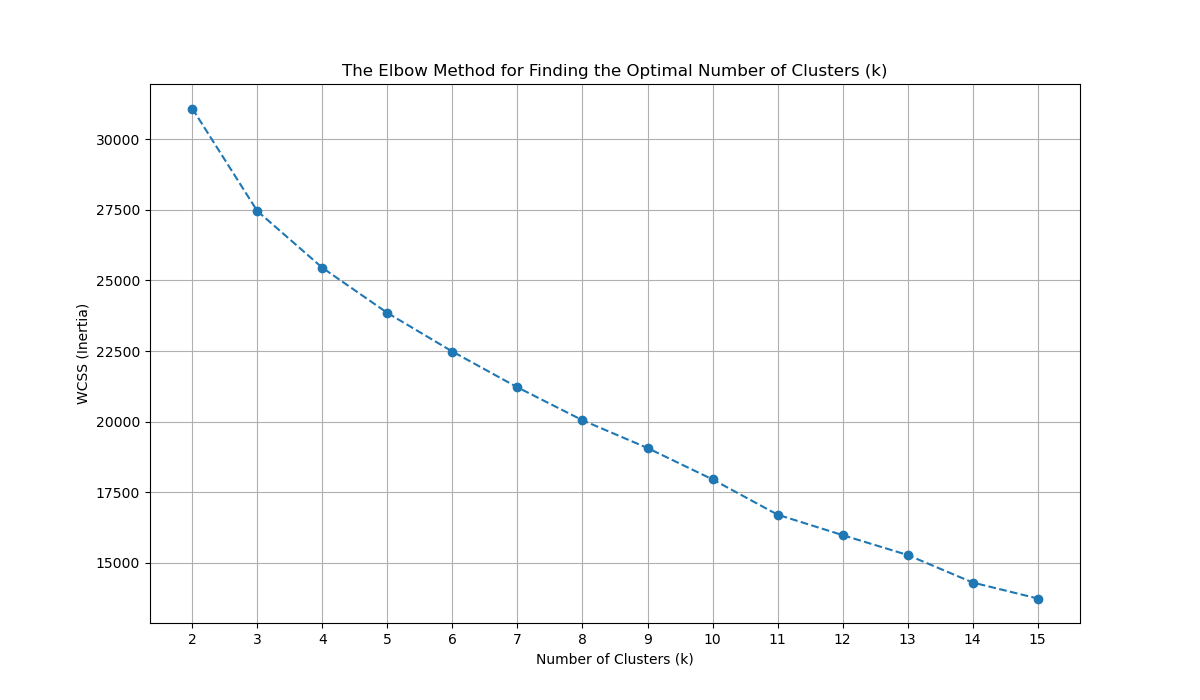

In [401]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Step 1: Prepare the Final DataFrame for Clustering ---

# Set aside the 'Model' column and drop any other non-feature columns
# We will add the 'Model' name back after clustering
model_names = df1['Model']
# Ensure 'Unnamed: 0' and 'Warranty' are dropped if they still exist
cols_to_drop = ['Model']
if 'Unnamed: 0' in df1.columns:
    cols_to_drop.append('Unnamed: 0')
if 'Warranty' in df1.columns:
    cols_to_drop.append('Warranty')

final_df_for_clustering = df1.drop(columns=cols_to_drop)


# --- Step 2: Apply Feature Weighting ---

# Define the OS columns to be weighted
os_columns = [col for col in final_df_for_clustering.columns if col.startswith('OS_')]
weight = 100 # You can experiment with this value

print(f"Applying a weight of {weight} to the following columns: {os_columns}")

# Multiply the specified columns by the weight
final_df_for_clustering[os_columns] = final_df_for_clustering[os_columns] * weight


# --- Step 3: Scale all Features ---

scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df_for_clustering)

print("\nData has been weighted, scaled, and is ready for clustering!")


# --- Step 4: Run the Elbow Method to Find the Optimal 'k' ---

wcss = [] # Within-Cluster Sum of Squares
cluster_range = range(2, 16)

print("\nRunning K-Means for k=2 to 15 to find the elbow...")

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

print("Elbow method analysis complete.")

# --- Plotting the Elbow Method Graph ---
plt.figure(figsize=(12, 7))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Finding the Optimal Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [402]:
from sklearn.cluster import KMeans
import pandas as pd

# This code assumes you have 'df1' and the 'scaled_data' variable from the previous steps.

# --- Step 1: Train the Final K-Means Model with k=6 ---
k = 8
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# --- Step 2: This is the line that CREATES the 'Cluster' column ---
df1['Cluster'] = cluster_labels

# --- Step 3: Analyze the Results ---
print("--- Cluster Analysis ---")
print("\nNumber of laptops per cluster:")
print(df1['Cluster'].value_counts().sort_index())

--- Cluster Analysis ---

Number of laptops per cluster:
Cluster
0    208
1     18
2     52
3    291
4    100
5     56
6     28
7    167
Name: count, dtype: int64


In [403]:
# # --- Explore Your Clusters ---
# # Change this number to see any cluster from 0 to 5
# cluster_to_explore = 1

# # The key features we want to see to understand the cluster
# key_features = ['Model', 'Price', 'Rating', 'Core_Count', 'Processor_Generation', 'Ram_GB', 'SSD_GB']

# print(f"--- Displaying all Laptops in Cluster {cluster_to_explore} ---")
# df1[df1['Cluster'] == cluster_to_explore][key_features]

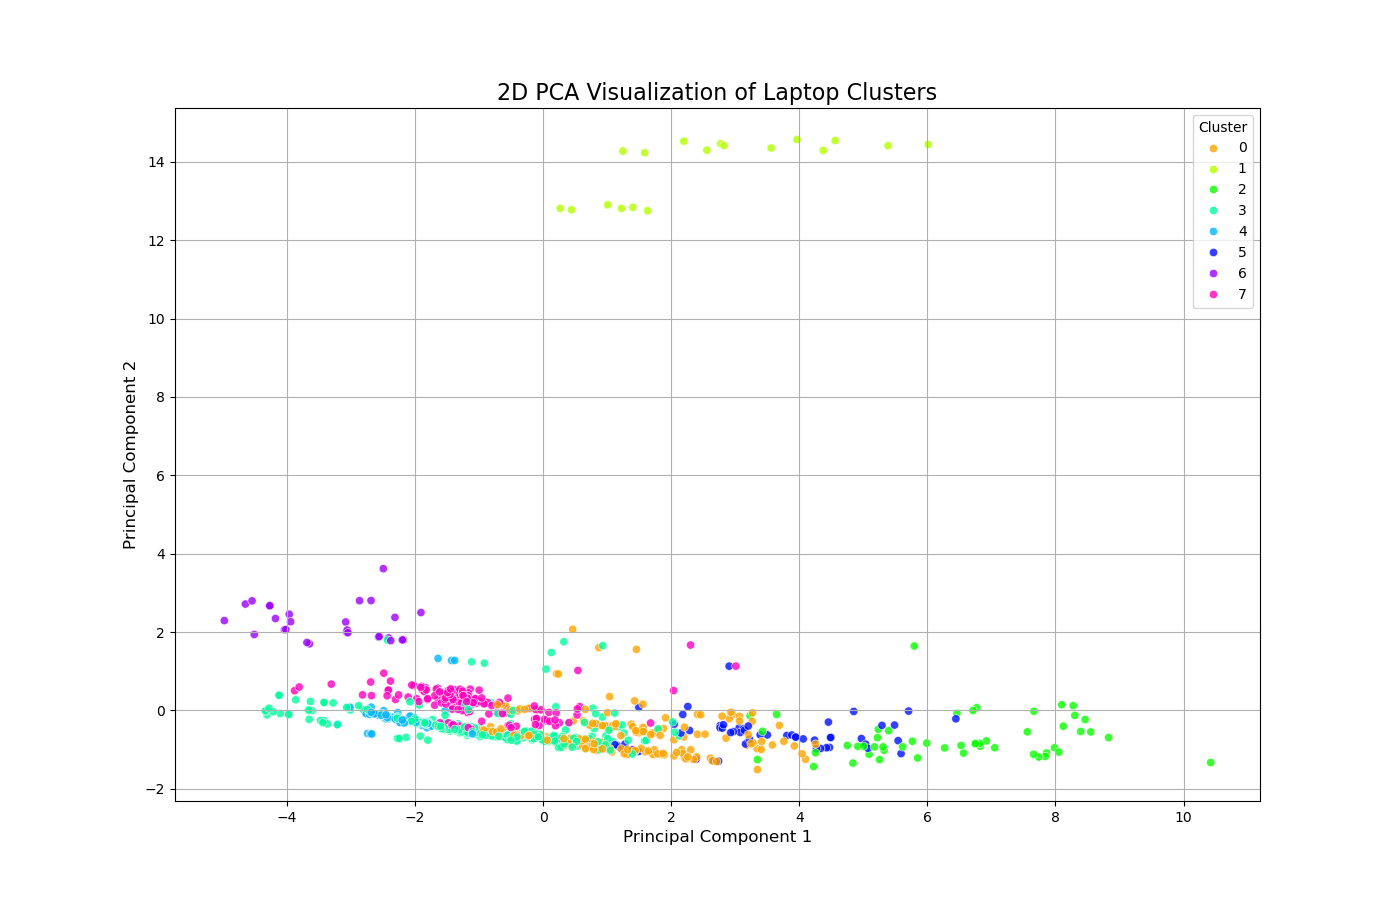

Explained variance by Principal Component 1: 16.25%
Explained variance by Principal Component 2: 11.33%
Total variance explained by top 2 components: 27.58%


In [404]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 1: Perform PCA to reduce data to 2 dimensions ---

# We want the top two eigenvectors, so n_components=2
pca = PCA(n_components=2)

# Fit PCA on the same scaled data used for clustering and transform it
principal_components = pca.fit_transform(scaled_data)


# --- Step 2: Create a new DataFrame for plotting ---

# Create a DataFrame with the two principal components
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['Principal Component 1', 'Principal Component 2'])

# Add the 'Cluster' labels from your original DataFrame.
# .values is used to ensure the cluster labels are added correctly without index issues.
pca_df['Cluster'] = df1['Cluster'].values


# --- Step 3: Plot the 2D PCA results ---

plt.figure(figsize=(14, 9))
sns.scatterplot(
    x='Principal Component 1', 
    y='Principal Component 2',
    hue='Cluster',
    palette=sns.color_palette("hsv", n_colors=8), # Using 8 colors for your 8 clusters
    data=pca_df,
    legend='full',
    alpha=0.8
)

plt.title('2D PCA Visualization of Laptop Clusters', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


# --- Optional: Check Explained Variance ---
# This tells you how much information (variance) is captured by the top two components.
print(f"Explained variance by Principal Component 1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Explained variance by Principal Component 2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained by top 2 components: {pca.explained_variance_ratio_.sum():.2%}")

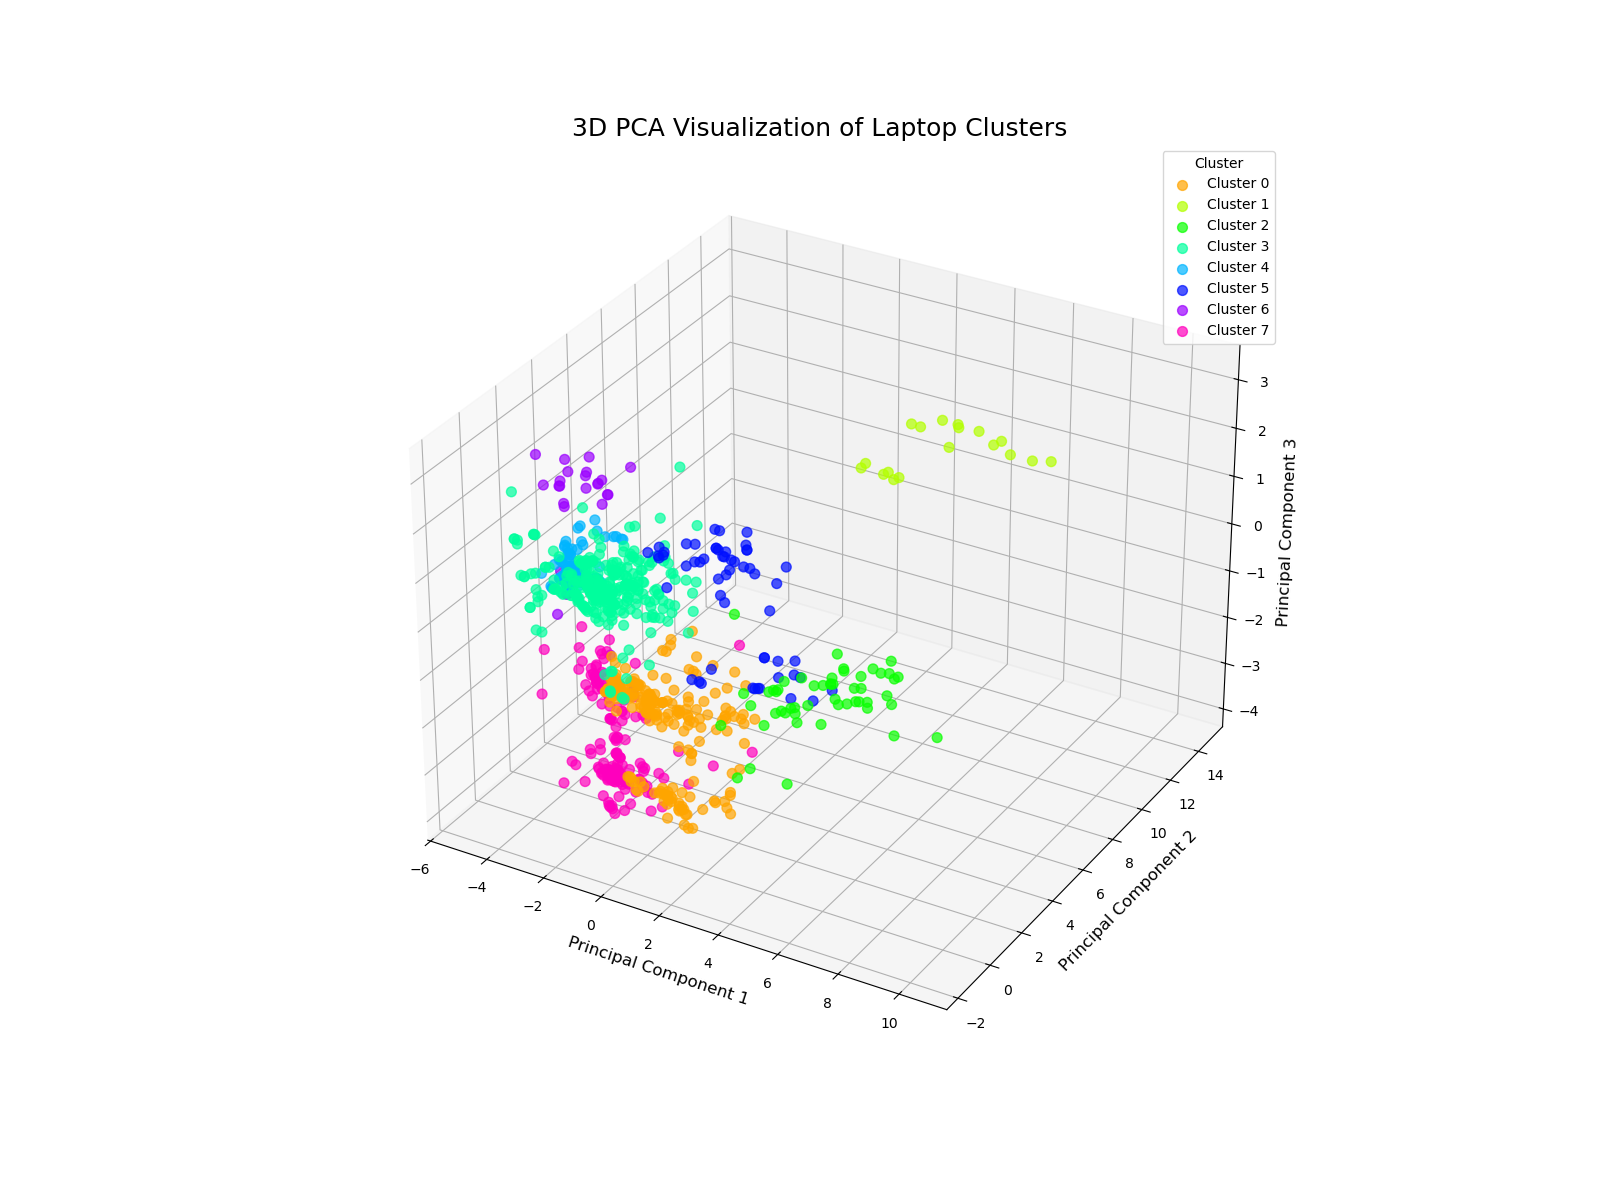

Explained variance by PC1: 16.25%
Explained variance by PC2: 11.33%
Explained variance by PC3: 7.37%
Total variance explained by top 3 components: 34.95%


In [405]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import is necessary for 3D plotting
import pandas as pd
import seaborn as sns

# --- Step 1: Perform PCA to reduce data to 3 dimensions ---

# We now want the top three eigenvectors, so n_components=3
pca_3d = PCA(n_components=3)

# Fit PCA on the same scaled data and transform it
principal_components_3d = pca_3d.fit_transform(scaled_data)


# --- Step 2: Create a new DataFrame for the 3D data ---

# Create a DataFrame with the three principal components
pca_df_3d = pd.DataFrame(data=principal_components_3d, 
                         columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Add the 'Cluster' labels from your original DataFrame
pca_df_3d['Cluster'] = df1['Cluster'].values


# --- Step 3: Plot the 3D PCA results ---

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Get a color palette with 8 distinct colors for your clusters
palette = sns.color_palette("hsv", n_colors=8)

# Create a scatter plot for each cluster to generate the legend correctly
for cluster_num in sorted(pca_df_3d['Cluster'].unique()):
    # Filter data for the current cluster
    cluster_data = pca_df_3d[pca_df_3d['Cluster'] == cluster_num]
    ax.scatter(
        xs=cluster_data['Principal Component 1'], 
        ys=cluster_data['Principal Component 2'], 
        zs=cluster_data['Principal Component 3'], 
        c=[palette[cluster_num]],  # Assign color from the palette
        label=f'Cluster {cluster_num}',
        s=50,  # Marker size
        alpha=0.7
    )

ax.set_title('3D PCA Visualization of Laptop Clusters', fontsize=18)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.legend(title='Cluster')
ax.grid(True)

plt.show()


# --- Optional: Check Explained Variance for 3 components ---
print(f"Explained variance by PC1: {pca_3d.explained_variance_ratio_[0]:.2%}")
print(f"Explained variance by PC2: {pca_3d.explained_variance_ratio_[1]:.2%}")
print(f"Explained variance by PC3: {pca_3d.explained_variance_ratio_[2]:.2%}")
print(f"Total variance explained by top 3 components: {pca_3d.explained_variance_ratio_.sum():.2%}")

In [406]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


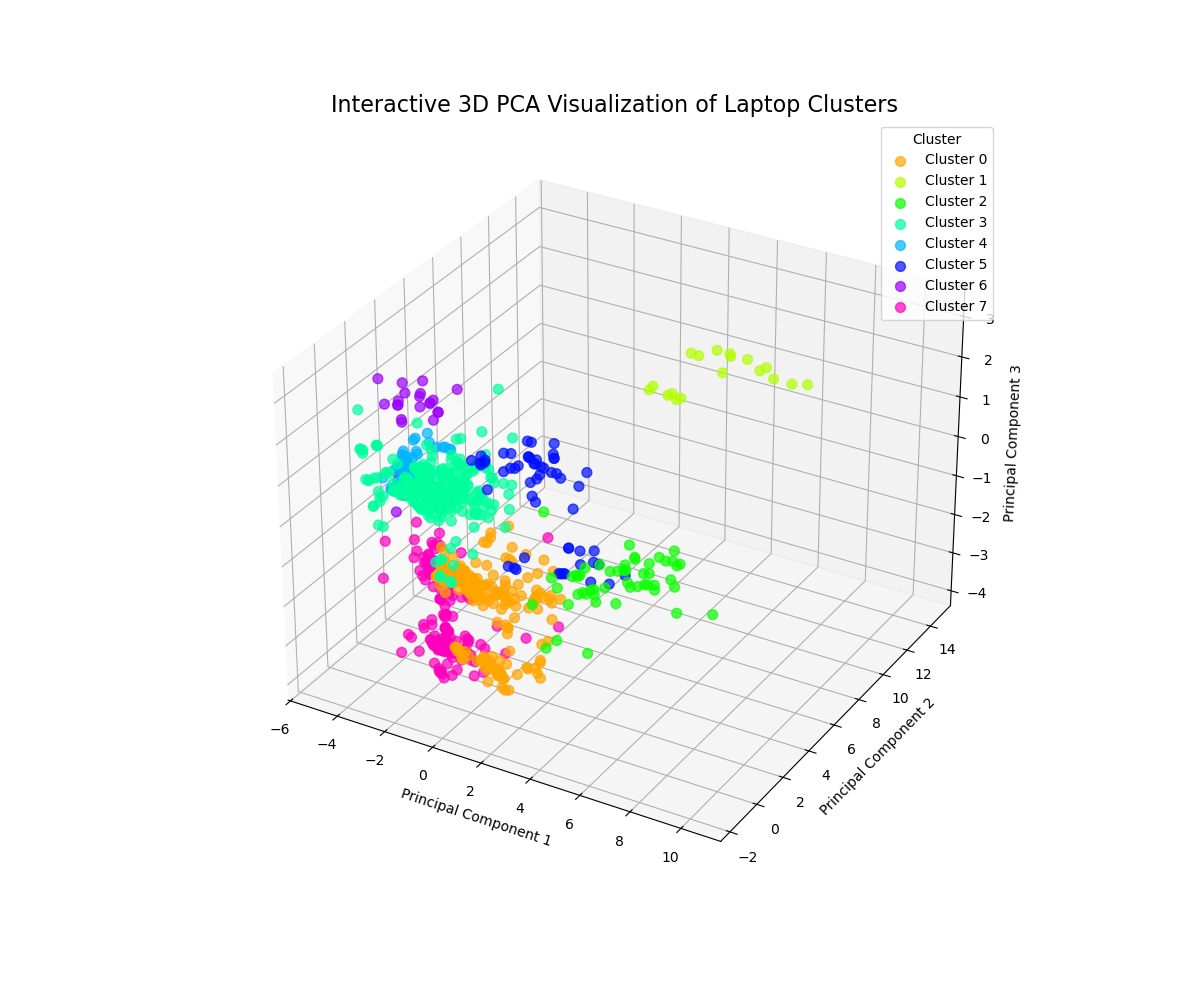

In [407]:
# Enable the interactive widget backend for Matplotlib
%matplotlib widget

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

# This code assumes 'scaled_data' and 'df1' are still in memory

# --- Perform PCA to get 3 components ---
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_data)

# --- Create a DataFrame for the 3D data ---
pca_df_3d = pd.DataFrame(data=principal_components_3d, 
                         columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df_3d['Cluster'] = df1['Cluster'].values

# --- Plot the interactive 3D results ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

palette = sns.color_palette("hsv", n_colors=8)

for cluster_num in sorted(pca_df_3d['Cluster'].unique()):
    cluster_data = pca_df_3d[pca_df_3d['Cluster'] == cluster_num]
    ax.scatter(
        xs=cluster_data['Principal Component 1'], 
        ys=cluster_data['Principal Component 2'], 
        zs=cluster_data['Principal Component 3'], 
        c=[palette[cluster_num]],
        label=f'Cluster {cluster_num}',
        s=50,
        alpha=0.7
    )

ax.set_title('Interactive 3D PCA Visualization of Laptop Clusters', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(title='Cluster')
ax.grid(True)

plt.show()

--- DBSCAN Clustering Results ---
Number of clusters found:  21
Number of noise points found:  330

Cluster distribution:
-1     330
 1      96
 0      78
 4      50
 9      49
 10     38
 3      34
 6      29
 7      28
 11     22
 8      21
 19     19
 18     18
 13     15
 14     14
 17     14
 5      12
 15     12
 16     11
 2      10
 12     10
 20     10
Name: count, dtype: int64


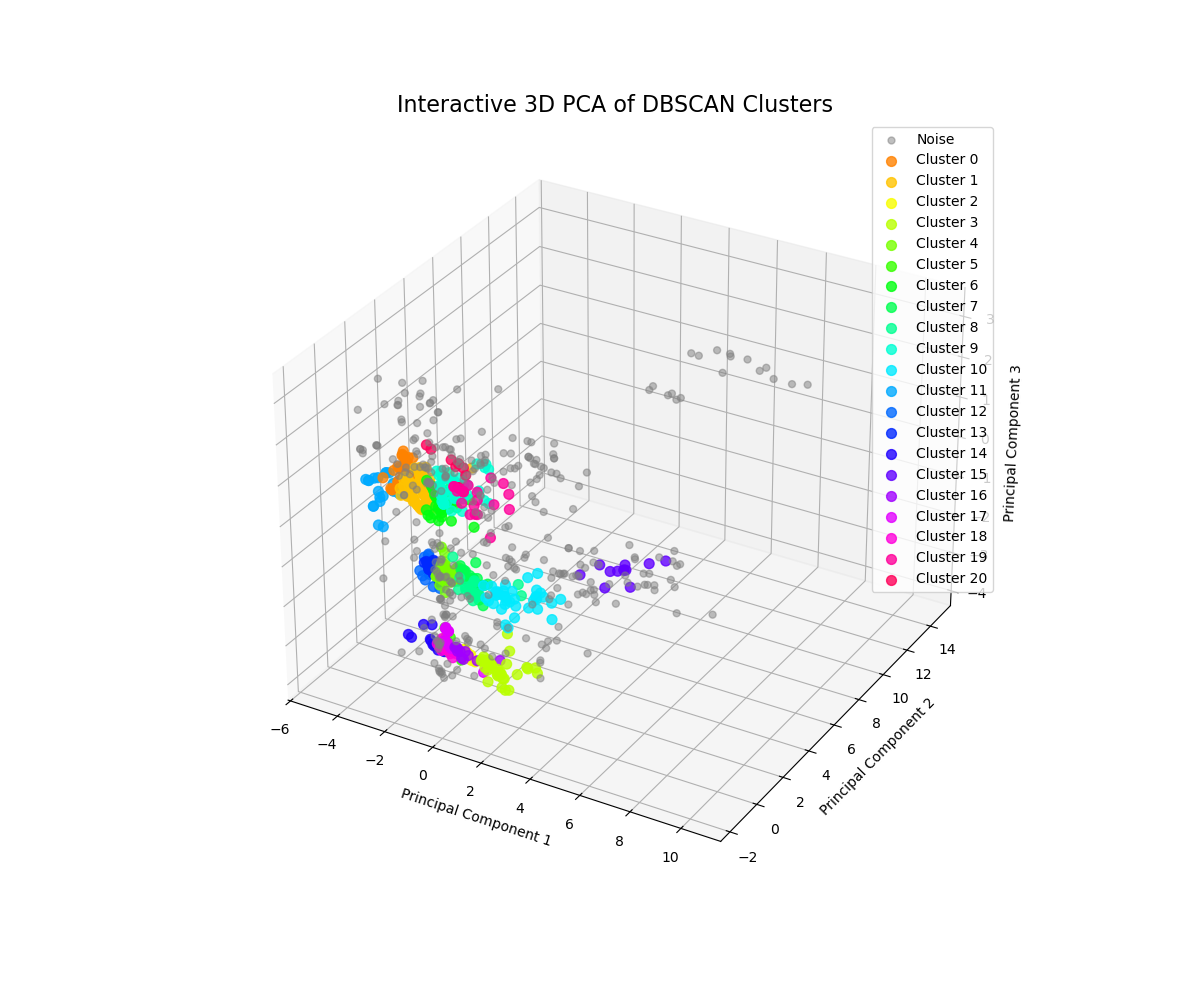

In [408]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns

# --- Step 1: Fit the DBSCAN Model ---
# These parameters may need tuning for optimal results.
# 'eps' is the radius of the neighborhood.
# 'min_samples' is the minimum number of points required to form a dense region.
dbscan = DBSCAN(eps=2.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add the DBSCAN cluster labels to the original dataframe
df1['DBSCAN_Cluster'] = dbscan_labels

print("--- DBSCAN Clustering Results ---")
print("Number of clusters found: ", len(np.unique(dbscan_labels)) - 1) # Subtract 1 for the noise cluster
print("Number of noise points found: ", np.sum(dbscan_labels == -1))
print("\nCluster distribution:")
print(pd.Series(dbscan_labels).value_counts())


# --- Step 2: Create the 3D PCA Plot for DBSCAN ---
# We'll use the same 3-component PCA from before
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_data)

# Create a DataFrame for plotting
pca_df_dbscan = pd.DataFrame(data=principal_components_3d, 
                             columns=['PC1', 'PC2', 'PC3'])
pca_df_dbscan['Cluster'] = dbscan_labels

# Plotting
%matplotlib widget
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a palette. We need one extra color for the noise points (-1).
unique_labels = sorted(np.unique(dbscan_labels))
colors = sns.color_palette("hsv", n_colors=len(unique_labels))

for i, cluster_num in enumerate(unique_labels):
    cluster_data = pca_df_dbscan[pca_df_dbscan['Cluster'] == cluster_num]
    
    if cluster_num == -1:
        # Plot noise points in grey
        ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
                   c='grey', label='Noise', s=25, alpha=0.5)
    else:
        ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
                   c=[colors[i]], label=f'Cluster {cluster_num}', s=50, alpha=0.8)

ax.set_title('Interactive 3D PCA of DBSCAN Clusters', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


--- GMM Clustering Results ---
Cluster distribution:
0     28
1     73
2     74
3     18
4    379
5     56
6     88
7    204
Name: count, dtype: int64


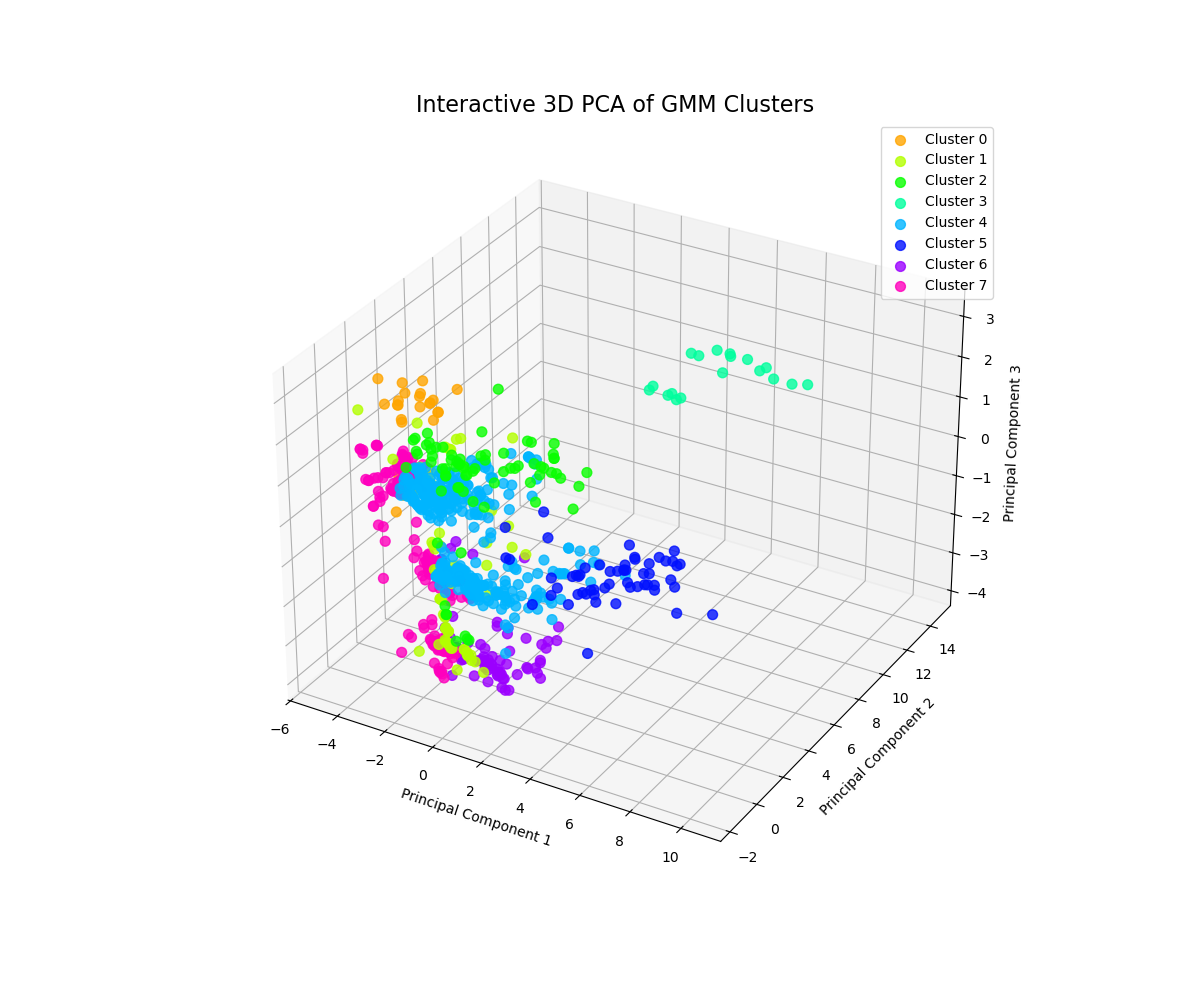

In [409]:
# Import necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

# --- Step 1: Fit the GMM ---
# We set n_components=8 to match the number of clusters from K-Means.
gmm = GaussianMixture(n_components=8, random_state=42)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

# Add the GMM cluster labels to the original dataframe
df1['GMM_Cluster'] = gmm_labels

print("\n--- GMM Clustering Results ---")
print("Cluster distribution:")
print(pd.Series(gmm_labels).value_counts().sort_index())


# --- Step 2: Create the 3D PCA Plot for GMM ---
# Re-using the same PCA transformation
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_data)

# Create a DataFrame for plotting
pca_df_gmm = pd.DataFrame(data=principal_components_3d, 
                          columns=['PC1', 'PC2', 'PC3'])
pca_df_gmm['Cluster'] = gmm_labels

# Plotting
%matplotlib widget
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

palette = sns.color_palette("hsv", n_colors=8)

for cluster_num in sorted(pca_df_gmm['Cluster'].unique()):
    cluster_data = pca_df_gmm[pca_df_gmm['Cluster'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               c=[palette[cluster_num]], label=f'Cluster {cluster_num}', s=50, alpha=0.8)

ax.set_title('Interactive 3D PCA of GMM Clusters', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

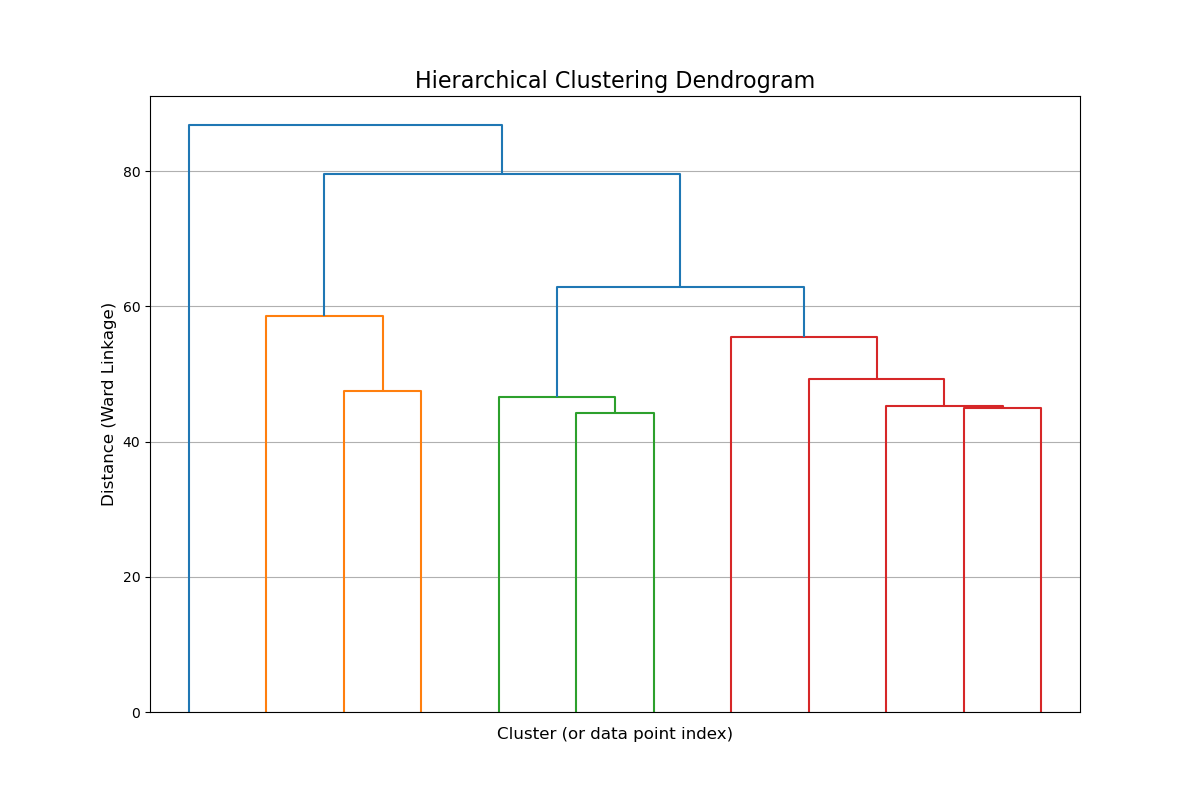

In [410]:
# Import necessary libraries for the dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Create the linkage matrix ---
# The 'ward' method is a common choice that minimizes the variance of the clusters being merged.
linked = linkage(scaled_data, method='ward')

# --- Plot the dendrogram ---
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           # The following lines are optional but help make the plot cleaner for large datasets
           truncate_mode='lastp',  # Show only the last p merged clusters
           p=12,                   # The number of clusters to show at the bottom
           show_leaf_counts=False) # Do not show the number of points in each leaf

plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Cluster (or data point index)', fontsize=12)
plt.ylabel('Distance (Ward Linkage)', fontsize=12)
plt.grid(axis='y')
plt.show()


--- Hierarchical Clustering Results (k=8) ---
Cluster distribution:
0    209
1     60
2    312
3     18
4    137
5     27
6    116
7     41
Name: count, dtype: int64


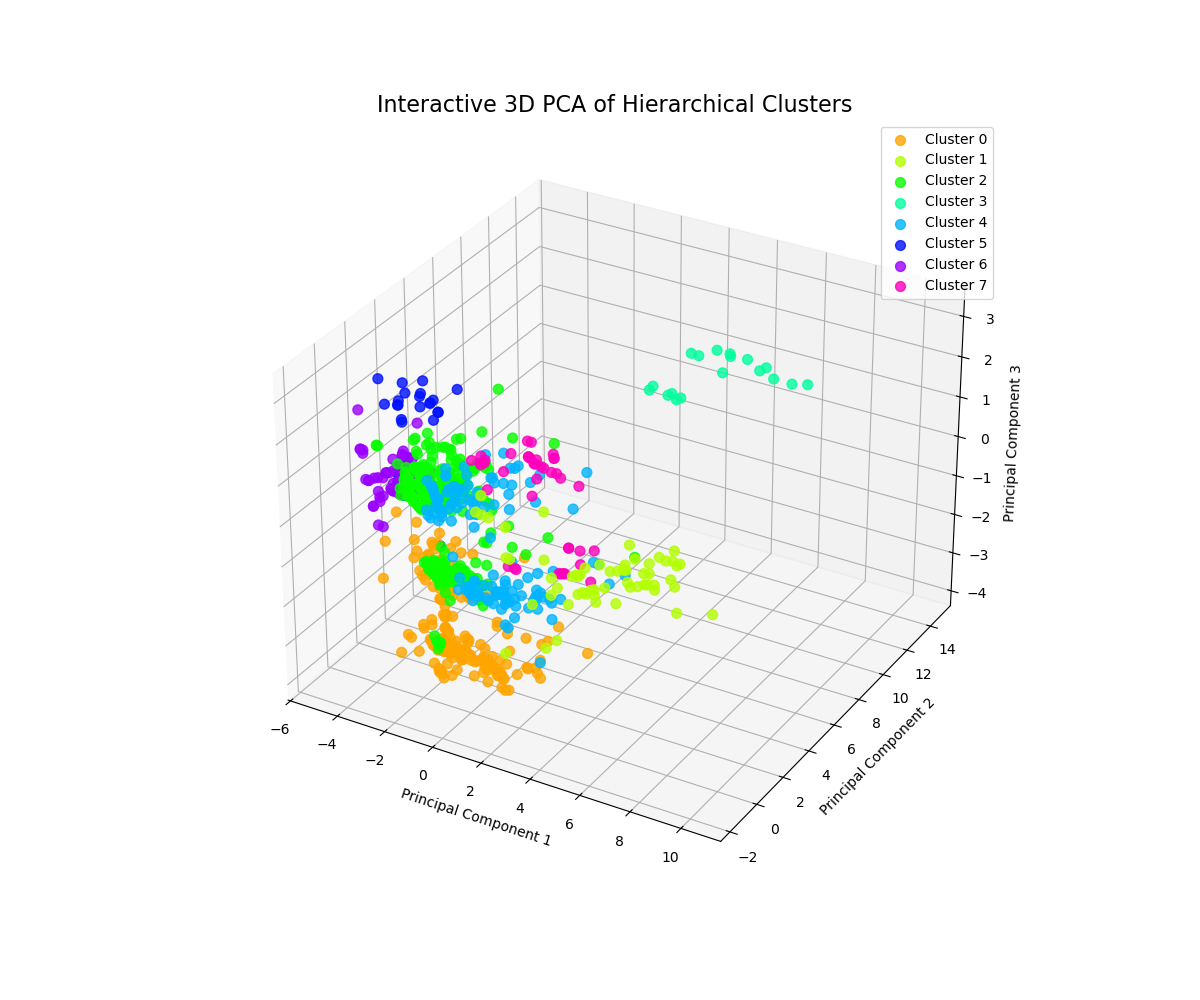

In [411]:
# Import the main clustering and PCA libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

# --- Step 2a: Fit the Agglomerative Clustering Model ---
# We specify n_clusters=8 based on our previous analysis and the dendrogram.
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, linkage='ward')
hierarchical_labels = hierarchical_cluster.fit_predict(scaled_data)

# Add the labels to the original dataframe
df1['Hierarchical_Cluster'] = hierarchical_labels

print("\n--- Hierarchical Clustering Results (k=8) ---")
print("Cluster distribution:")
print(pd.Series(hierarchical_labels).value_counts().sort_index())


# --- Step 2b: Create the 3D PCA Plot ---
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_data)

# Create a DataFrame for plotting
pca_df_hierarchical = pd.DataFrame(data=principal_components_3d, 
                                   columns=['PC1', 'PC2', 'PC3'])
pca_df_hierarchical['Cluster'] = hierarchical_labels

# Plotting
%matplotlib widget
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

palette = sns.color_palette("hsv", n_colors=8)

for cluster_num in sorted(pca_df_hierarchical['Cluster'].unique()):
    cluster_data = pca_df_hierarchical[pca_df_hierarchical['Cluster'] == cluster_num]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               c=[palette[cluster_num]], label=f'Cluster {cluster_num}', s=50, alpha=0.8)

ax.set_title('Interactive 3D PCA of Hierarchical Clusters', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [412]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np

# This is a helper function to process the user's text-based specs
def process_input_specs(specs, all_columns):
    """Converts a user's spec dictionary into a one-hot encoded row."""
    # Start with a row of all zeros
    user_df = pd.DataFrame(columns=all_columns, index=[0]).fillna(0)
    
    # --- Fill in numerical features directly ---
    num_features = ['Price', 'Rating', 'SSD_GB', 'Ram_GB', 'Core_Count', 'Processor_Generation', 
                    'Screen_Size_Inches', 'X_Resolution', 'Y_Resolution', 'Is_Touchscreen']
    for feature in num_features:
        if feature in specs:
            user_df[feature] = specs[feature]

    # --- Handle categorical features (one-hot encoding) ---
    # RAM Type
    if 'Ram_Type' in specs:
        if specs['Ram_Type'].lower() in ['ddr5', 'lpddr5']: user_df['Ram_DDR5_Family'] = 1
        elif specs['Ram_Type'].lower() in ['ddr4', 'lpddr4']: user_df['Ram_DDR4_Family'] = 1
        # Add other types if necessary
        
    # OS Type (with weighting)
    weight = 100
    if 'OS' in specs:
        if specs['OS'].lower() == 'windows': user_df['OS_Windows'] = 1 * weight
        elif specs['OS'].lower() == 'mac': user_df['OS_Mac_OS'] = 1 * weight
        elif specs['OS'].lower() == 'linux': user_df['OS_Linux_DOS_Family'] = 1 * weight

    # CPU Type
    if 'CPU' in specs:
        cpu_col = 'CPU_' + specs['CPU'].replace(' ', '_')
        if cpu_col in user_df.columns:
            user_df[cpu_col] = 1
            
    # GPU Type
    if 'GPU' in specs:
        gpu_col = 'GPU_' + specs['GPU'].replace(' ', '_')
        if gpu_col in user_df.columns:
            user_df[gpu_col] = 1

    return user_df

def recommend_laptops(specs, df, n_rec=5):
    """
    Recommends laptops from the dataframe based on user-provided specifications.
    
    Args:
        specs (dict): A dictionary of the desired laptop specs.
        df (pd.DataFrame): The main dataframe (df1) containing all laptop data.
        n_rec (int): The number of recommendations to return.
        
    Returns:
        A DataFrame containing the top n_rec most similar laptops.
    """
    # 1. Prepare the data for distance calculation (same as in clustering)
    # These are all the columns used in the model
    feature_cols = [col for col in df.columns if col not in ['Model', 'Generation', 'Cluster', 
                                                              'DBSCAN_Cluster', 'GMM_Cluster', 
                                                              'Hierarchical_Cluster']]
    
    data_for_scaling = df[feature_cols].copy()
    
    # 2. Process the user's input specs into a compatible numerical format
    user_input_df = process_input_specs(specs, feature_cols)
    
    # 3. Scale both the dataset and the user input
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_scaling)
    scaled_user_input = scaler.transform(user_input_df)
    
    # 4. Calculate the Euclidean distance
    distances = euclidean_distances(scaled_user_input, scaled_data)
    
    # 5. Get the indices of the top N most similar laptops
    # We use [0] because distances is a 2D array [[dist1, dist2, ...]]
    similar_indices = np.argsort(distances[0])[:n_rec]
    
    # 6. Return the top recommendations from the original dataframe
    recommendations = df.iloc[similar_indices]
    
    return recommendations

In [413]:
# --- Please fill in your desired laptop specifications below ---

user_specs = {
    'Price': 85000,              # Approximate budget in INR
    'Ram_GB': 16,                # Common values: 8, 16, 32
    'SSD_GB': 512,               # Common values: 256, 512, 1024 (1TB)
    'Screen_Size_Inches': 15.6,  # Common values: 13.3, 14.0, 15.6, 16.0
    'Rating': 70,                # Desired rating (out of 100)
    'Is_Touchscreen': 1,         # Use 1 for Yes, 0 for No
    
    # --- Choose ONE from the options in the comments ---
    'OS': 'Windows',             # Options: 'Windows', 'Mac', 'Linux'
    
    'CPU': 'Intel_Core_i7',      # Options: 'Intel_Core_i3', 'Intel_Core_i5', 'Intel_Core_i7', 
                                 # 'AMD_Ryzen_5', 'AMD_Ryzen_7', 'Apple_M1_M2_Family', etc.
                                 
    'GPU': 'NVIDIA_High_Tier',   # Options: 'Intel_Integrated', 'AMD_Integrated', 
                                 # 'NVIDIA_Low_Tier', 'NVIDIA_Mid_Tier', 'NVIDIA_High_Tier', 
                                 # 'AMD_Low_Tier', 'AMD_High_Tier'
}

In [414]:
# Call the recommendation function with the user's specs and ask for 15 results
top_15_laptops = recommend_laptops(user_specs, df1, n_rec=15)

# Display the results
print("✅ Here are your top 15 laptop recommendations:")

# CORRECTED LINE: Removed 'CPU' and 'GPU' and added other existing columns for more detail.
display(top_15_laptops[['Model', 'Price', 'Ram_GB', 'SSD_GB', 'Rating', 'Screen_Size_Inches', 'Is_Touchscreen']])

✅ Here are your top 15 laptop recommendations:


/var/folders/90/ls620sjs055gfd72m314l3dw0000gn/T/ipykernel_74132/1992826022.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_df = pd.DataFrame(columns=all_columns, index=[0]).fillna(0)


Model   Price  Ram_GB  \
624  MSI Katana 17 B12VGK-672IN Gaming Laptop (12th...  134990      16   
713  HP ZBook Studio G9 WUXGA Workstation Laptop (1...  261921      16   
771  HP Envy 15-fe0030TU Laptop (13th Gen Core i7/ ...  109990      16   
216  HP Envy x360 15-fe0011TX Laptop (13th Gen Core...  120490      16   
855  Lenovo IdeaPad Slim 3 82H803B6IN Laptop (11th ...   56900      16   
503  HP Pavilion x360 14-ek1021TU Laptop (13th Gen ...   89990      16   
907  HP Pavilion x360 14-ek1020TU Laptop (13th Gen ...   89990      16   
765  HP Envy 15-fe0032TU Laptop (13th Gen Core i7/ ...  117000      16   
134  Acer Aspire Lite AL15-51 Laptop (11th Gen Core...   49499      16   
23   HP Envy x360 15-fe0014TX Laptop (13th Gen Core...  132490      16   
82   Asus TUF Gaming F15 FX506HE-HN382W Gaming Lapt...   69990      16   
527  Lenovo IdeaPad 3 82H803HRIN Laptop (11th Gen C...   59990      16   
407  Acer Aspire Lite 15 2023 AL15-51 Laptop (11th ...   53499      16   
300  HP Omen 16-wf1026TX Gaming Laptop (14th Gen Co...  176499      16   
455  Lenovo IdeaPad Flex 5 14IRU8 82Y0004TIN Laptop...   87990      16   

     SSD_GB  Rating  Screen_Size_Inches  Is_Touchscreen  
624  1024.0   75.00                17.3             0.0  
713  1024.0   75.57                16.0             0.0  
771   512.0   64.00                15.6             1.0  
216   512.0   68.00                15.6             1.0  
855   512.0   61.00                15.6             0.0  
503   512.0   65.00                14.0             1.0  
907   512.0   65.00                14.0             1.0  
765  1024.0   65.00                15.6             1.0  
134   512.0   59.00                15.6             0.0  
23   1024.0   69.00                15.6             1.0  
82    512.0   66.00                15.6             0.0  
527   512.0   55.00                15.6             0.0  
407  1024.0   60.00                15.6             0.0  
300  1024.0   75.36                16.1             0.0  
455   512.0   61.00                14.0             1.0

In [415]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity # Switched to cosine similarity
import pandas as pd
import numpy as np

# The helper function 'process_input_specs' remains the same as before.
def process_input_specs(specs, all_columns):
    """Converts a user's spec dictionary into a one-hot encoded row."""
    user_df = pd.DataFrame(columns=all_columns, index=[0]).fillna(0)
    num_features = ['Price', 'Rating', 'SSD_GB', 'Ram_GB', 'Core_Count', 'Processor_Generation', 
                    'Screen_Size_Inches', 'X_Resolution', 'Y_Resolution', 'Is_Touchscreen']
    for feature in num_features:
        if feature in specs:
            user_df[feature] = specs[feature]
    weight = 100
    if 'OS' in specs:
        if specs['OS'].lower() == 'windows': user_df['OS_Windows'] = 1 * weight
        elif specs['OS'].lower() == 'mac': user_df['OS_Mac_OS'] = 1 * weight
        elif specs['OS'].lower() == 'linux': user_df['OS_Linux_DOS_Family'] = 1 * weight
    if 'CPU' in specs:
        cpu_col = 'CPU_' + specs['CPU'].replace(' ', '_')
        if cpu_col in user_df.columns: user_df[cpu_col] = 1
    if 'GPU' in specs:
        gpu_col = 'GPU_' + specs['GPU'].replace(' ', '_')
        if gpu_col in user_df.columns: user_df[gpu_col] = 1
    return user_df

def recommend_laptops_with_scores(specs, df, n_rec=15):
    """Recommends laptops and returns their cosine similarity score."""
    feature_cols = [col for col in df.columns if col not in ['Model', 'Generation', 'Cluster', 
                                                              'DBSCAN_Cluster', 'GMM_Cluster', 
                                                              'Hierarchical_Cluster']]
    data_for_scaling = df[feature_cols].copy()
    user_input_df = process_input_specs(specs, feature_cols)
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_scaling)
    scaled_user_input = scaler.transform(user_input_df)
    
    # Calculate cosine similarity (higher is better)
    similarity = cosine_similarity(scaled_user_input, scaled_data)
    
    # Get indices of top N scores (note the descending sort)
    similar_indices = np.argsort(similarity[0])[::-1][:n_rec]
    
    recommendations = df.iloc[similar_indices].copy() # Use .copy() to avoid SettingWithCopyWarning
    scores = similarity[0][similar_indices]
    
    # Add scores to the dataframe
    recommendations['Similarity_Score'] = scores
    
    return recommendations

# --- Example Usage ---
user_specs = {
    'Price': 85000, 'Ram_GB': 16, 'SSD_GB': 512, 'Screen_Size_Inches': 15.6,
    'Rating': 70, 'Is_Touchscreen': 0, 'OS': 'Windows',
    'CPU': 'Intel_Core_i7', 'GPU': 'NVIDIA_High_Tier'
}

top_15_laptops_with_scores = recommend_laptops_with_scores(user_specs, df1, n_rec=15)

print("✅ Here are your top 15 recommendations with similarity scores:")
display(top_15_laptops_with_scores[['Model', 'Price', 'Ram_GB', 'SSD_GB', 'Rating', 'Screen_Size_Inches', 'Is_Touchscreen']])

✅ Here are your top 15 recommendations with similarity scores:


/var/folders/90/ls620sjs055gfd72m314l3dw0000gn/T/ipykernel_74132/2991281847.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_df = pd.DataFrame(columns=all_columns, index=[0]).fillna(0)


Model  Price  Ram_GB  SSD_GB  \
759  Lenovo Thinkpad E15 21E6S05B00 Laptop (12th Ge...  65750       8   512.0   
530  Lenovo Thinkpad E15 21E6S07S00 Laptop (12th Ge...  77990      16   512.0   
268  Lenovo Thinkbook 15 21DJA0FGIH Laptop (12th Ge...  55990      16   512.0   
758  Lenovo Thinkbook 15 21DJ00EXIH Laptop (12th Ge...  53990       8   512.0   
656  Asus Vivobook 15 X1502ZA-EJ545WS Laptop (12th ...  51990      16   512.0   
360  Acer Aspire 5 A515-57 NX.K3JSI.006 Laptop (12t...  46990       8   512.0   
918  Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...  54900      16   512.0   
352  Acer Aspire Lite AL15-52 Laptop (12th Gen Core...  45200      16   512.0   
322  Lenovo IdeaPad Slim 3 82H803LKIN Laptop (11th ...  49999      16   512.0   
604  Lenovo V15 82KB00RJIH Laptop (11th Gen Core i5...  48990      16   512.0   
477  Lenovo V15 G3 82TTA02UIH Laptop (12th Gen Core...  44990       8   512.0   
11   Zebronics Pro Series Z ZEB-NBC 4S Laptop (12th...  32990      16   512.0   
361  HP 15s-fq2510tu Laptop (11th Gen Core i5/ 16GB...  50790      16   512.0   
416  Zebronics Pro Series Z ZEB-NBC 4S 2023 Laptop ...  31990       8   512.0   
149  HP 15s-fr5011TU Laptop (12th Gen Core i5/ 16GB...  53799      16   512.0   

     Rating  Screen_Size_Inches  Is_Touchscreen  
759    63.0                15.6             0.0  
530    59.0                15.6             0.0  
268    60.0                15.6             0.0  
758    62.0                15.6             0.0  
656    59.0                15.6             0.0  
360    60.0                15.6             0.0  
918    63.0                15.6             0.0  
352    59.0                15.6             0.0  
322    62.0                15.6             0.0  
604    61.0                15.6             0.0  
477    59.0                15.6             0.0  
11     64.0                15.6             0.0  
361    60.0                15.6             0.0  
416    62.0                15.6             0.0  
149    57.0                15.6             0.0

In [416]:
print("--- Analyzing Cluster Membership of the 15 Recommended Laptops ---\n")

# K-Means Clusters
print("K-Means Cluster Distribution:")
print(top_15_laptops_with_scores['Cluster'].value_counts())
print("-" * 30)

# GMM Clusters
print("GMM Cluster Distribution:")
print(top_15_laptops_with_scores['GMM_Cluster'].value_counts())
print("-" * 30)

# Hierarchical Clusters
print("Hierarchical Cluster Distribution:")
print(top_15_laptops_with_scores['Hierarchical_Cluster'].value_counts())
print("-" * 30)

# DBSCAN Clusters
print("DBSCAN Cluster Distribution:")
print(top_15_laptops_with_scores['DBSCAN_Cluster'].value_counts())
print("-" * 30)

--- Analyzing Cluster Membership of the 15 Recommended Laptops ---

K-Means Cluster Distribution:
Cluster
3    15
Name: count, dtype: int64
------------------------------
GMM Cluster Distribution:
GMM_Cluster
4    15
Name: count, dtype: int64
------------------------------
Hierarchical Cluster Distribution:
Hierarchical_Cluster
2    15
Name: count, dtype: int64
------------------------------
DBSCAN Cluster Distribution:
DBSCAN_Cluster
1    15
Name: count, dtype: int64
------------------------------


In [417]:
# --- Define the Importance of Each Feature ---
# On a scale of 1 to 10, where 1 is default and 10 is most important.

feature_weights = {
    'Price': 1,           # I am very sensitive to price.
    'Rating': 10,           # I don't trust ratings as much.
    'Ram_GB': 10,           # RAM is very important for my work.
    'SSD_GB': 10,           # Storage size is quite important.
    'Is_Touchscreen': 0,   # I don't care about a touchscreen.
    
    # You can also weigh the importance of CPU/GPU/OS types.
    # For example, if you strongly prefer NVIDIA:
    'GPU_NVIDIA_High_Tier': 1,
    'GPU_NVIDIA_Mid_Tier': 1,
    'CPU_Intel_Core_i7': 1,
}

In [418]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Helper function 'process_input_specs' remains the same
def process_input_specs(specs, all_columns):
    user_df = pd.DataFrame(columns=all_columns, index=[0]).fillna(0)
    num_features = ['Price', 'Rating', 'SSD_GB', 'Ram_GB', 'Core_Count', 'Processor_Generation', 
                    'Screen_Size_Inches', 'X_Resolution', 'Y_Resolution', 'Is_Touchscreen']
    for feature in num_features:
        if feature in specs:
            user_df[feature] = specs[feature]
    weight = 100
    if 'OS' in specs:
        if specs['OS'].lower() == 'windows': user_df['OS_Windows'] = 1 * weight
        elif specs['OS'].lower() == 'mac': user_df['OS_Mac_OS'] = 1 * weight
        elif specs['OS'].lower() == 'linux': user_df['OS_Linux_DOS_Family'] = 1 * weight
    if 'CPU' in specs:
        cpu_col = 'CPU_' + specs['CPU'].replace(' ', '_')
        if cpu_col in user_df.columns: user_df[cpu_col] = 1
    if 'GPU' in specs:
        gpu_col = 'GPU_' + specs['GPU'].replace(' ', '_')
        if gpu_col in user_df.columns: user_df[gpu_col] = 1
    return user_df


def recommend_laptops_with_weights(specs, df, weights, n_rec=15):
    """Recommends laptops based on user-provided specs and feature weights."""
    
    feature_cols = [col for col in df.columns if col not in ['Model', 'Generation', 'Cluster', 
                                                              'DBSCAN_Cluster', 'GMM_Cluster', 
                                                              'Hierarchical_Cluster']]
    
    data_for_scaling = df[feature_cols].copy()
    user_input_df = process_input_specs(specs, feature_cols)
    
    # --- THIS IS THE NEW STEP: APPLY WEIGHTS ---
    for feature, weight in weights.items():
        if feature in data_for_scaling.columns:
            # Apply weight to both the dataset and the user's input
            data_for_scaling[feature] *= weight
            user_input_df[feature] *= weight
            
    # Scale the data AFTER applying weights
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_scaling)
    scaled_user_input = scaler.transform(user_input_df)
    
    # Calculate cosine similarity on the weighted data
    similarity = cosine_similarity(scaled_user_input, scaled_data)
    
    similar_indices = np.argsort(similarity[0])[::-1][:n_rec]
    
    recommendations = df.iloc[similar_indices].copy()
    recommendations['Similarity_Score'] = similarity[0][similar_indices]
    
    return recommendations

In [419]:
# --- Example Usage ---

# 1. Define your ideal laptop specs (same as before)
user_specs = {
    'Price': 85000, 'Ram_GB': 16, 'SSD_GB': 512, 'Screen_Size_Inches': 15.6,
    'Rating': 70, 'Is_Touchscreen': 0, 'OS': 'Windows',
    'CPU': 'Intel_Core_i7', 'GPU': 'NVIDIA_High_Tier'
}

# 2. Call the new function with the weights
weighted_recommendations = recommend_laptops_with_weights(
    specs=user_specs, 
    df=df1, 
    weights=feature_weights, 
    n_rec=15
)

# 3. Display the results
print("✅ Here are your top 15 personalized recommendations based on your weights:")
display(weighted_recommendations[['Model', 'Price', 'Ram_GB', 'SSD_GB', 'Similarity_Score']])

✅ Here are your top 15 personalized recommendations based on your weights:


/var/folders/90/ls620sjs055gfd72m314l3dw0000gn/T/ipykernel_74132/3067690476.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_df = pd.DataFrame(columns=all_columns, index=[0]).fillna(0)


Model  Price  Ram_GB  SSD_GB  \
759  Lenovo Thinkpad E15 21E6S05B00 Laptop (12th Ge...  65750       8   512.0   
530  Lenovo Thinkpad E15 21E6S07S00 Laptop (12th Ge...  77990      16   512.0   
268  Lenovo Thinkbook 15 21DJA0FGIH Laptop (12th Ge...  55990      16   512.0   
758  Lenovo Thinkbook 15 21DJ00EXIH Laptop (12th Ge...  53990       8   512.0   
656  Asus Vivobook 15 X1502ZA-EJ545WS Laptop (12th ...  51990      16   512.0   
360  Acer Aspire 5 A515-57 NX.K3JSI.006 Laptop (12t...  46990       8   512.0   
918  Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...  54900      16   512.0   
352  Acer Aspire Lite AL15-52 Laptop (12th Gen Core...  45200      16   512.0   
753  HP Envy x360 15-ew0041TU Laptop (12th Gen Core...  82990      16   512.0   
322  Lenovo IdeaPad Slim 3 82H803LKIN Laptop (11th ...  49999      16   512.0   
477  Lenovo V15 G3 82TTA02UIH Laptop (12th Gen Core...  44990       8   512.0   
604  Lenovo V15 82KB00RJIH Laptop (11th Gen Core i5...  48990      16   512.0   
11   Zebronics Pro Series Z ZEB-NBC 4S Laptop (12th...  32990      16   512.0   
361  HP 15s-fq2510tu Laptop (11th Gen Core i5/ 16GB...  50790      16   512.0   
416  Zebronics Pro Series Z ZEB-NBC 4S 2023 Laptop ...  31990       8   512.0   

     Similarity_Score  
759          0.083672  
530          0.083503  
268          0.083103  
758          0.083020  
656          0.082290  
360          0.081986  
918          0.081777  
352          0.081732  
753          0.081540  
322          0.081478  
477          0.081303  
604          0.081267  
11           0.081226  
361          0.081091  
416          0.080955